
# **Decision Trees and Random Forest Lab Notebook**

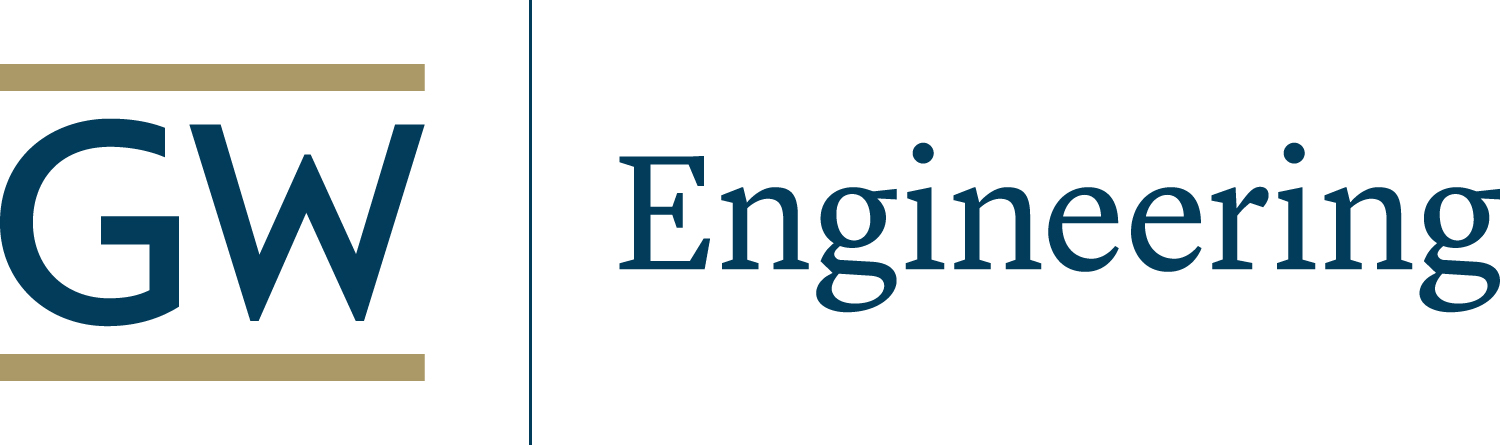


### **Forward Selection Example**

In [1]:
#Load the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [ ]:
#Rememeber to use your Google drive to save work and use data files.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset (Using Boston dataset as an example)
df_hitters = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Hitters.csv')


In [ ]:
#initial check of the data
df_hitters.head(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


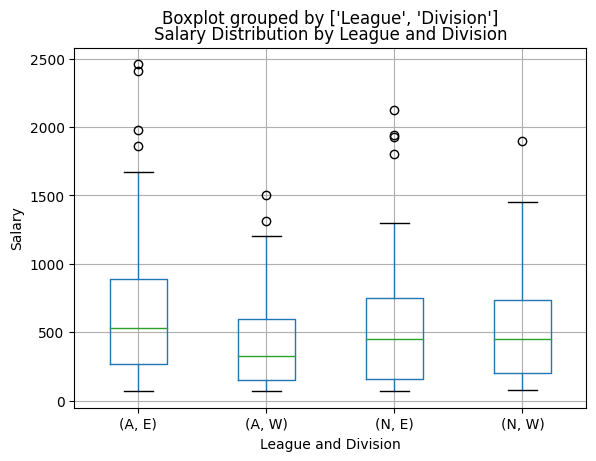

In [ ]:
# @title Salary Distribution by League and Division

import matplotlib.pyplot as plt

df_hitters.boxplot(column='Salary', by=['League', 'Division'])
plt.xlabel('League and Division')
plt.ylabel('Salary')
_ = plt.title('Salary Distribution by League and Division')

In [ ]:
#do a quick transformation to numeric for the catagorical data
l_encoder = LabelEncoder()

for col in df_hitters.columns:
    if df_hitters[col].dtype == 'object':
        df_hitters[col] = l_encoder.fit_transform(df_hitters[col])

df_hitters.head(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,0,0,446,33,20,NaN,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.0,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.0,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,91.5,1


In [ ]:
#dropping NaN but other solutions could be used - impuation.
df_hitters.isna().sum()

,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0
CHmRun,0


In [ ]:
df_hitters = df_hitters.dropna()

In [ ]:
#Predicting Salary
X = df_hitters.drop(['Salary'], axis=1)
y = df_hitters['Salary']

In [ ]:
#T-T Split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=13)

In [ ]:
'''
Barebones and selected features regression so we can compare once we use regularication techniques.
There is not a library that does this easily with SM, we we will use sklearn.
'''
model_baseline = LinearRegression()
model_sfs = LinearRegression()

In [ ]:
#Lets get the baseline
model_baseline.fit(X_train, y_train)
y_pred = model_baseline.predict(X_test)
y_train_pred = model_baseline.predict(X_train)
#...and get its results
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Train Mean Squared Error:", mse_train)
print("R-squared Train:", r2_train)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Train Mean Squared Error: 81554.19720775279
R-squared Train: 0.49612319961816553
Mean Squared Error: 146519.33445108763
R-squared: 0.30600665382448256


In [ ]:
# Perform forward selection
sfs = SequentialFeatureSelector(model_baseline, n_features_to_select='auto', direction='forward', cv=5)
sfs.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[sfs.get_support()]
print("Selected Features:", selected_features)

# Fit the final model with the selected features
model_sfs.fit(X_train[selected_features], y_train)

# Make predictions on the test and train sets
y_pred = model_sfs.predict(X_test[selected_features])
y_train_pred = model_sfs.predict(X_train[selected_features])

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = model_sfs.score(X_train[selected_features], y_train)
mse = mean_squared_error(y_test, y_pred)
r2 = model_sfs.score(X_test[selected_features], y_test)

print("Train Mean Squared Error:", mse_train)
print("R-squared Train:", r2_train)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Selected Features: Index(['Years', 'CHmRun', 'CRBI', 'CWalks', 'League', 'Division', 'PutOuts',
       'Assists', 'NewLeague'],
      dtype='object')
Train Mean Squared Error: 109993.15741943764
R-squared Train: 0.32041510894631176
Mean Squared Error: 130197.08382035703
R-squared: 0.3833174973030792


### **Ridge Regression**

In [ ]:
#Preferred to scale data for the Ridge
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Instantiate the Ridge regression model
ridge = Ridge(alpha=4)  # alpha is the regularization strength

# Fit the model to the training data
ridge.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ridge.predict(X_test_scaled)
y_train_pred = ridge.predict(X_train_scaled)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = ridge.score(X_train_scaled, y_train)
mse = mean_squared_error(y_test, y_pred)
r2 = ridge.score(X_test_scaled, y_test)
print("Train Mean Squared Error:", mse_train)
print("Train R-squared:", r2_train)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Ridge Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)

Train Mean Squared Error: 93182.5462385251
Train R-squared: 0.4242782731280822
Mean Squared Error: 132184.4648627913
R-squared: 0.3739042057062274
Ridge Coefficients: [   0.         -113.4565241    46.49947119  -13.49682916   45.1273489
  -32.81392448   44.62541619  -62.23823086   22.52333688   42.23941545
  120.95821403   16.32191529   79.45255314  -88.01088961   63.23993434
  -58.9907039   119.44989489  121.72074794 -103.33957355  -22.34892441]
Intercept: 457.84860377358495


### **The Lasso**

In [ ]:
# Instantiate the Lasso regression model
lasso = Lasso(alpha=4)  # alpha is the regularization strength

# Fit the model to the training data
lasso.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lasso.predict(X_test_scaled)
y_train_pred = lasso.predict(X_train_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = lasso.score(X_test_scaled, y_test)
print("Train Mean Squared Error:", mean_squared_error(y_train, y_train_pred))
print("Train R-squared:", lasso.score(X_train_scaled, y_train))
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Ridge Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)

Train Mean Squared Error: 87700.9734219488
Train R-squared: 0.4581457804599297
Mean Squared Error: 130941.77699832268
R-squared: 0.379790235099858
Ridge Coefficients: [  0.         -95.28351259  37.63185356 -10.51305555  41.43311003
 -32.09244451  40.82650001 -51.2924252   19.77321164  35.0037862
 114.35509474  13.65691658  73.21619483 -71.48361486  57.97081057
 -58.02617664 115.67641298 114.7064173  -99.67870814 -17.31160179]
Intercept: 457.84860377358495


### **Decision Trees**

In [11]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df_car = pd.read_csv('../data/Auto.csv')

In [13]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [14]:
df_car.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [15]:
df_car['horsepower'] = pd.to_numeric(df_car['horsepower'], errors='coerce')

In [16]:
df_car.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [17]:
df_car = df_car.dropna()

In [18]:
df_car = df_car.drop('name', axis=1)

In [19]:
df_car.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1


In [20]:
#Lets predict where a car comes from...
X = df_car.drop(['origin'], axis=1)
y = df_car['origin']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the DecisionTreeClassifier
clf = DTC(random_state=42, max_depth=3, criterion='gini')


In [21]:
clf

DecisionTreeClassifier(max_depth=3, random_state=42)

In [22]:

# Fit the model to the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

Accuracy: 0.6962025316455697

Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.95      0.85        43
           2       0.60      0.30      0.40        20
           3       0.50      0.50      0.50        16

    accuracy                           0.70        79
   macro avg       0.62      0.58      0.58        79
weighted avg       0.67      0.70      0.67        79



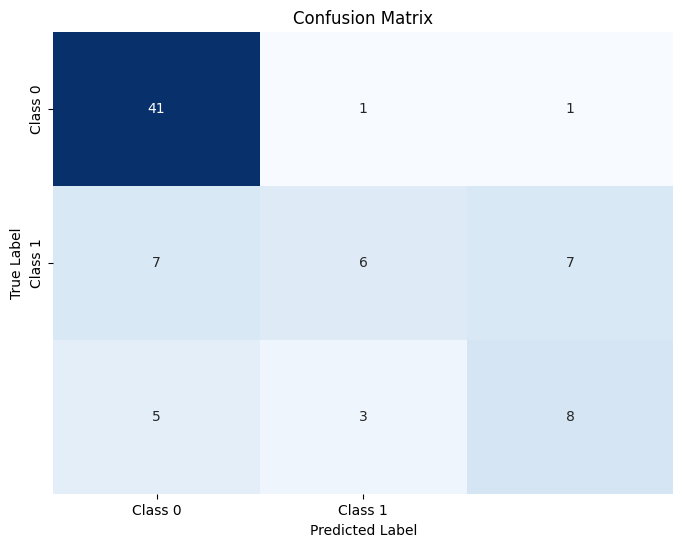

In [23]:

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [25]:
# Make predictions on the test set
y_pred_train = clf.predict(X_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", train_accuracy)
print("\nClassification Report:\n", classification_report(y_train, y_pred_train))


Accuracy: 0.8242811501597445

Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.98      0.93       202
           2       0.60      0.50      0.55        48
           3       0.72      0.57      0.64        63

    accuracy                           0.82       313
   macro avg       0.74      0.68      0.70       313
weighted avg       0.81      0.82      0.81       313



In [ ]:

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

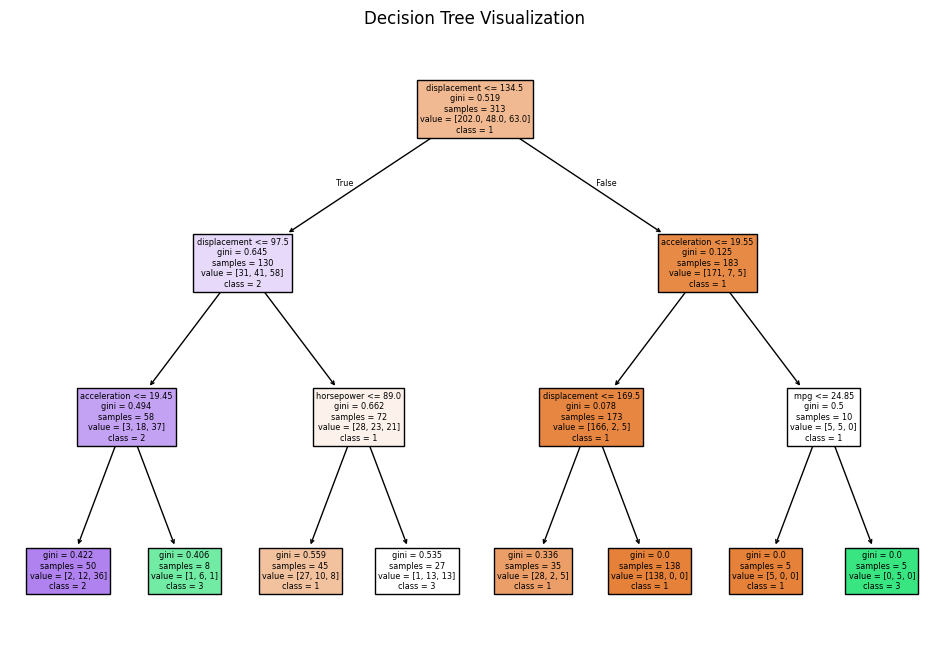

In [26]:
plt.figure(figsize=(12, 8))
plot_tree(clf, class_names=y.unique().astype(str), feature_names=X.columns, filled=True)
plt.title('Decision Tree Visualization')
plt.show()

In [ ]:
print(export_text(clf,
                  feature_names=X.columns,
                  show_weights=True))

|--- displacement <= 134.50
|   |--- displacement <= 97.50
|   |   |--- acceleration <= 19.45
|   |   |   |--- weights: [2.00, 12.00, 36.00] class: 3
|   |   |--- acceleration >  19.45
|   |   |   |--- weights: [1.00, 6.00, 1.00] class: 2
|   |--- displacement >  97.50
|   |   |--- horsepower <= 89.00
|   |   |   |--- weights: [27.00, 10.00, 8.00] class: 1
|   |   |--- horsepower >  89.00
|   |   |   |--- weights: [1.00, 13.00, 13.00] class: 2
|--- displacement >  134.50
|   |--- acceleration <= 19.55
|   |   |--- displacement <= 169.50
|   |   |   |--- weights: [28.00, 2.00, 5.00] class: 1
|   |   |--- displacement >  169.50
|   |   |   |--- weights: [138.00, 0.00, 0.00] class: 1
|   |--- acceleration >  19.55
|   |   |--- mpg <= 24.85
|   |   |   |--- weights: [5.00, 0.00, 0.00] class: 1
|   |   |--- mpg >  24.85
|   |   |   |--- weights: [0.00, 5.00, 0.00] class: 2



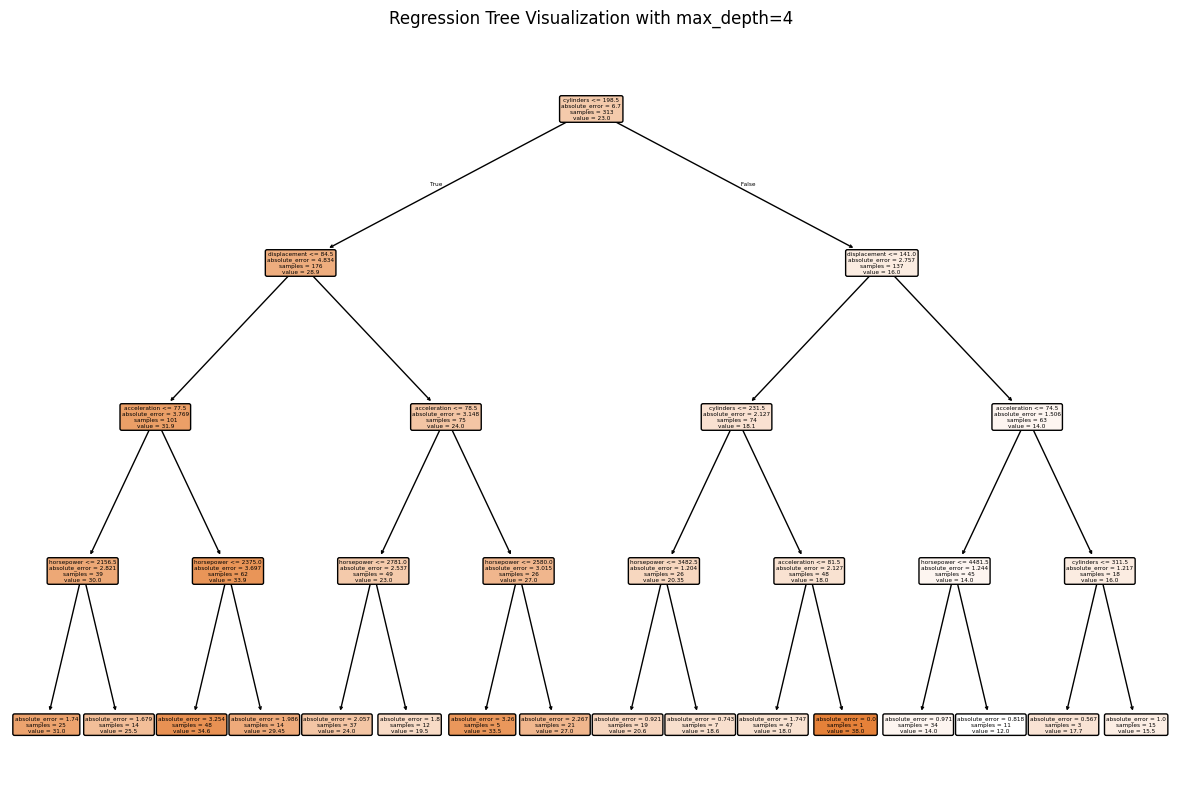

In [28]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Lets predict MPG
X = df_car.drop(['mpg'], axis=1)
y = df_car['mpg']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the DecisionTreeRegressor with a max_depth of 4
regressor = DecisionTreeRegressor(max_depth=4, random_state=42, criterion='absolute_error')
regressor.fit(X_train, y_train)

# Plot the regression tree
plt.figure(figsize=(15, 10))
plot_tree(regressor, feature_names=df_car.columns, filled=True, rounded=True)
plt.title('Regression Tree Visualization with max_depth=' + str(regressor.max_depth))
plt.show()

In [29]:
y_train_pred = regressor.predict(X_train)
y_pred = regressor.predict(X_test)


mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("Training Set Performance:")
print("Mean Absolute Error:", mae_train)
print("Mean Squared Error:", mse_train)
print("Root Mean Squared Error:", rmse_train)
print("R-squared:", r2_train)

mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred)

print("\nTest Set Performance:")
print("Mean Absolute Error:", mae_test)
print("Mean Squared Error:", mse_test)
print("Root Mean Squared Error:", rmse_test)
print("R-squared:", r2_test)

Training Set Performance:
Mean Absolute Error: 1.8405750798722045
Mean Squared Error: 7.124936102236422
Root Mean Squared Error: 2.669257593833241
R-squared: 0.8870845482009775

Test Set Performance:
Mean Absolute Error: 2.4556962025316458
Mean Squared Error: 11.569430379746834
Root Mean Squared Error: 3.401386537832305
R-squared: 0.7733287974908858


In [30]:
y.mean()

np.float64(23.445918367346938)

### **Random Forest**

Training Set Performance:
Mean Absolute Error (MAE): 0.7659488817891371
Mean Squared Error (MSE): 1.1991122044728453
Root Mean Squared Error (RMSE): 1.0950398186700085
R² Score: 0.9809965599153551

Test Set Performance:
Mean Absolute Error (MAE): 1.7185569620253163
Mean Squared Error (MSE): 5.680200075949368
Root Mean Squared Error (RMSE): 2.3833170321947033
R² Score: 0.888712085258602


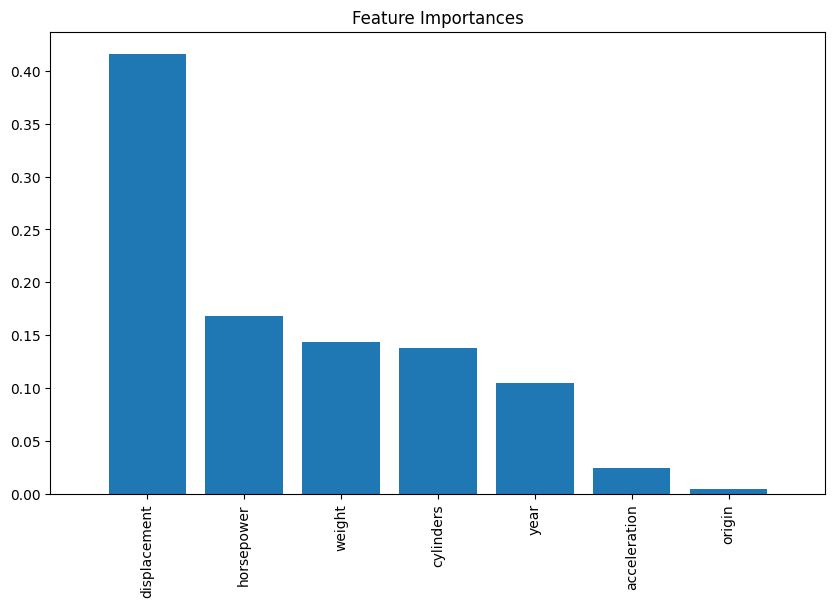

In [31]:
from sklearn.ensemble import RandomForestRegressor

X = df_car.drop(['mpg'], axis=1)
y = df_car['mpg']


Training Set Performance:
Mean Absolute Error (MAE): 0.8773003194888181
Mean Squared Error (MSE): 1.5205997156549533
Root Mean Squared Error (RMSE): 1.2331259934227943
R² Score: 0.9759016500029032

Test Set Performance:
Mean Absolute Error (MAE): 1.8091518987341773
Mean Squared Error (MSE): 6.290204493670887
Root Mean Squared Error (RMSE): 2.5080280089486418
R² Score: 0.8767607246157425


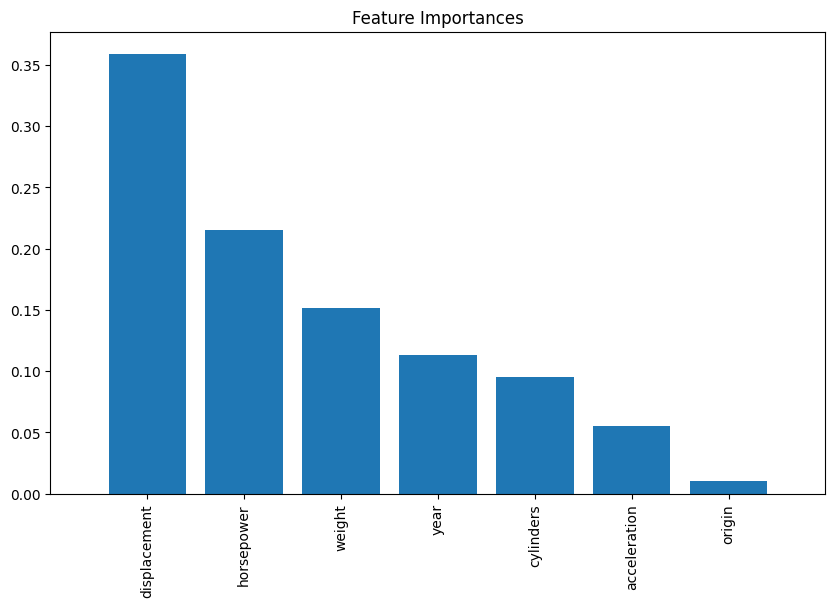

In [32]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=50, random_state=42, max_depth=10, criterion='absolute_error')
rf_regressor.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

# Calculate performance metrics for the training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Calculate performance metrics for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print the performance metrics for both training and test sets
print("Training Set Performance:")
print("Mean Absolute Error (MAE):", mae_train)
print("Mean Squared Error (MSE):", mse_train)
print("Root Mean Squared Error (RMSE):", rmse_train)
print("R² Score:", r2_train)

print("\nTest Set Performance:")
print("Mean Absolute Error (MAE):", mae_test)
print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("R² Score:", r2_test)

# Optional: Plot feature importances
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


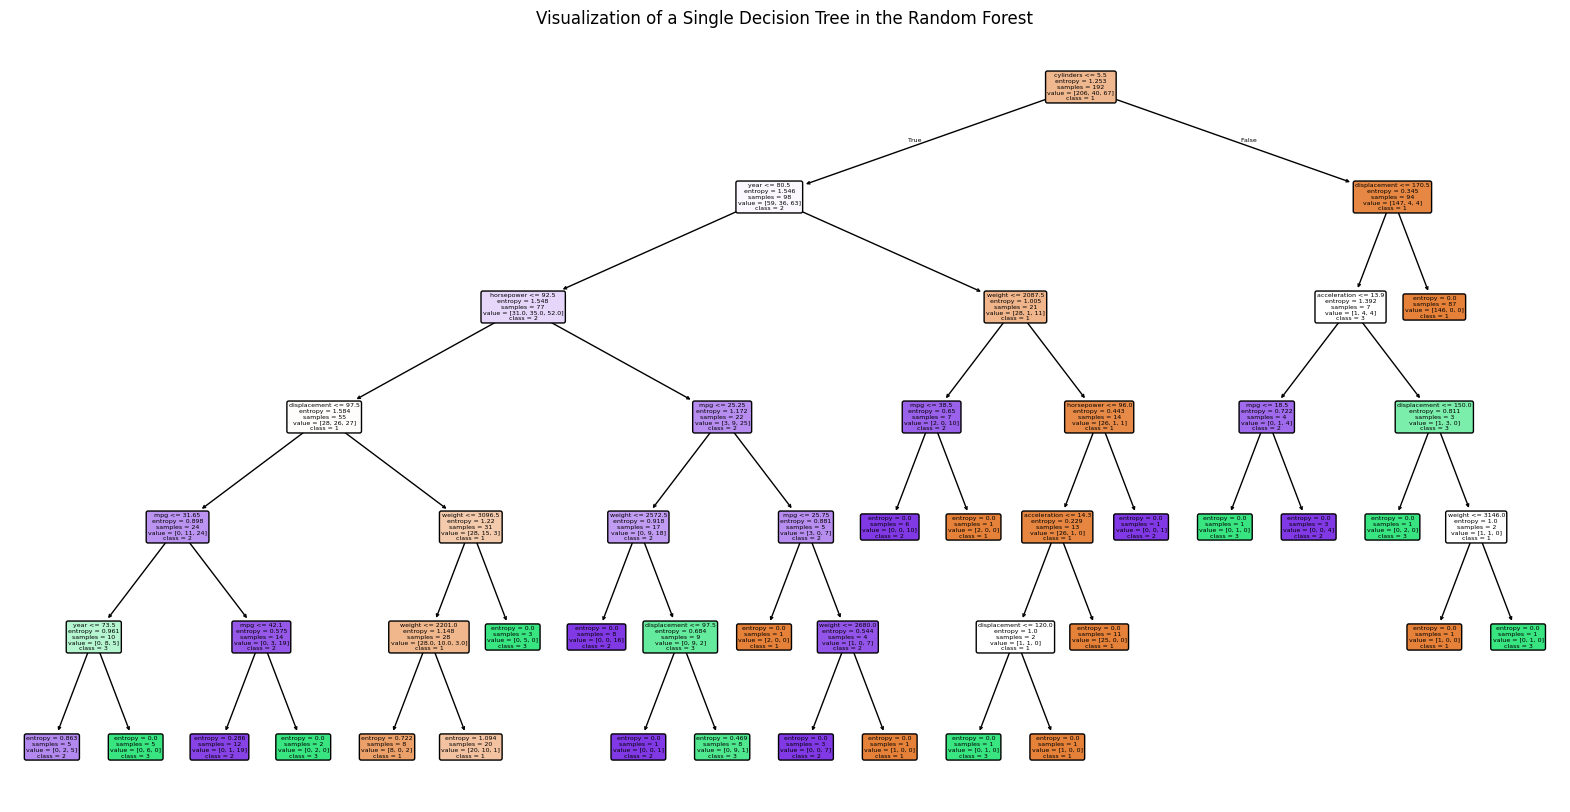

In [34]:
from sklearn.ensemble import RandomForestClassifier

X = df_car.drop(['origin'], axis=1)
y = df_car['origin']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=6, criterion='entropy')
rf_classifier.fit(X_train, y_train)

# Select one tree from the forest
tree_to_plot = rf_classifier.estimators_[1] # Selecting the first tree in the forest

# Plot the selected tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns, class_names=y.unique().astype(str), filled=True, rounded=True)
plt.title('Visualization of a Single Decision Tree in the Random Forest')
plt.show()


Accuracy: 0.7848101265822784

Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.93      0.88        43
           2       0.67      0.70      0.68        20
           3       0.80      0.50      0.62        16

    accuracy                           0.78        79
   macro avg       0.77      0.71      0.73        79
weighted avg       0.78      0.78      0.78        79



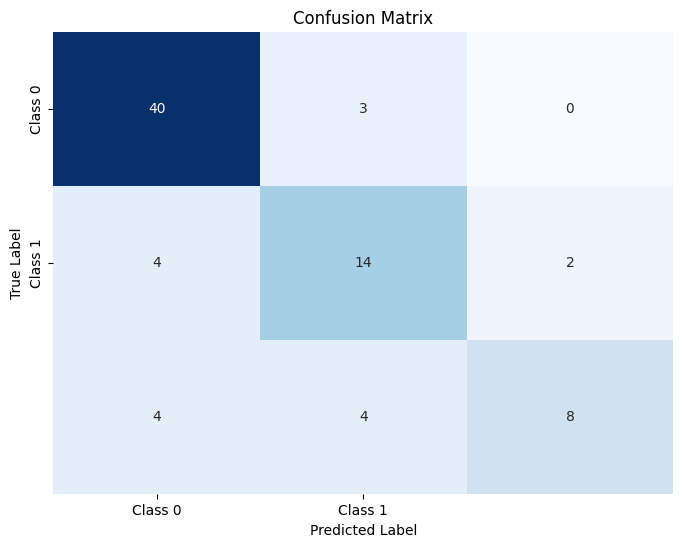

In [35]:
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()